In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# --- Configuration (Corrected Path) ---
FILE_NAME = 'data/flights_sample_3m.csv'
OUTPUT_FILE = 'flights_cleaned_for_dashboard.csv'
# ------------------------------------

print(f"--- Starting Flight Data Analysis for {FILE_NAME} ---")

try:
    # Load the dataset using Pandas
    df = pd.read_csv(FILE_NAME)
    print(f" Dataset loaded successfully. Initial shape: {df.shape}")
except FileNotFoundError:
    print(f" Error: The file '{FILE_NAME}' was not found. Please ensure it is in the 'data' folder.")
    df = None 
    
df_cleaned = df.copy() # Initialize the dataframe for cleaning in subsequent cells whivh change need to be done 

--- Starting Flight Data Analysis for data/flights_sample_3m.csv ---
 Dataset loaded successfully. Initial shape: (3000000, 32)


In [4]:
# Cell 2: Initial Exploration (.head(), .shape, .info(), .describe())
if df is not None:
    print("## 1. EDA: Initial Exploration ##")
    
    print("\n--- df.head() ---")
    print(df.head())
    
    print("\n--- df.shape ---")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    
    print("\n--- df.info() (Data Types and Non-Null Counts) ---")
    df.info()

    print("\n--- df.describe().T (Numerical Summary) ---")
    key_stats_cols = ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'AIR_TIME', 'CANCELLED', 'DIVERTED']
    print(df[key_stats_cols].describe().T)

## 1. EDA: Initial Exploration ##

--- df.head() ---
      FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST              DEST_CITY  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  ARR_TIME  ARR_DELAY  CANCELLED CANCELLATION_CODE  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA     19977       1562    FLL  Fort Lauderdale, FL  EWR             Newark, NJ          1155   1151.00      -4.00     19.00     1210.00    1443.00     4.00          1501   1447.00     -14.00       0.00               NaN      0.00            186.00        176.00    153.00   1065.00                NaN                NaN            NaN                 NaN                      NaN
1  2022-11-19   Delta Air Lines Inc. 

In [5]:
#  Cell 3: Data Quality Check - Missing Values and Duplicates

if df is not None:
    print("## 2. EDA: Data Quality Check (Missing Values & Duplicates) ##\n")

    # 1️ Check for duplicate rows
    total_duplicates = df.duplicated().sum()
    print(f"--- Total Duplicate Rows: {total_duplicates} ---\n")

    # If duplicates exist, show a preview
    if total_duplicates > 0:
        print("Sample Duplicate Rows:")
        display(df[df.duplicated()].head(5))
    else:
        print("No duplicate rows found.\n")

    #  2 Check for missing values (count + percentage)
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100

    missing_df = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percent (%)': missing_percent
    }).sort_values(by='Missing Count', ascending=False)

    # Display only columns with missing data
    missing_df = missing_df[missing_df['Missing Count'] > 0]

    if not missing_df.empty:
        print("\n--- Missing Values Summary ---")
        display(missing_df.style.background_gradient('Reds').format({'Missing Percent (%)': '{:.2f}%'}))
    else:
        print("No missing values found in the dataset.")


## 2. EDA: Data Quality Check (Missing Values & Duplicates) ##

--- Total Duplicate Rows: 0 ---

No duplicate rows found.


--- Missing Values Summary ---


,Missing Count,Missing Percent (%)
CANCELLATION_CODE,2920860,97.36%
DELAY_DUE_LATE_AIRCRAFT,2466137,82.20%
DELAY_DUE_CARRIER,2466137,82.20%
DELAY_DUE_SECURITY,2466137,82.20%
DELAY_DUE_NAS,2466137,82.20%
DELAY_DUE_WEATHER,2466137,82.20%
ARR_DELAY,86198,2.87%
ELAPSED_TIME,86198,2.87%
AIR_TIME,86198,2.87%
WHEELS_ON,79944,2.66%


In [21]:
#  Cell 4: Missing Value Handling + No Data Loss (ONLY Missing Value + Duplicates)

if df is not None:
    print("## 2. EDA & Preprocessing: Data Quality Improvement ##")

    # Record original row count
    original_rows = len(df)

    #  1 Remove Duplicates
    total_duplicates = df.duplicated().sum()
    df = df.drop_duplicates()
    print(f"\n Removed {total_duplicates} duplicate rows")

    #  2 Missing Value Analysis (Before Fix)
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percent': missing_percent
    }).sort_values(by='Missing Count', ascending=False)

    print("\n🔍 Missing Values (Before Handling):")
    print(missing_df[missing_df['Missing Count'] > 0])

    #  3 Handle Missing Values Carefully (No Data Loss)

    # a) Numeric → median
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # b) Categorical → 'Unknown'
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna('Unknown')

    # c) Delay columns → 0
    for col in ['DEP_DELAY', 'ARR_DELAY']:
        if col in df.columns:
            df[col] = df[col].fillna(0)

    # d) Taxi times → median
    for col in ['TAXI_IN', 'TAXI_OUT']:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())

    # e) Air time → median
    if 'AIR_TIME' in df.columns:
        df['AIR_TIME'] = df['AIR_TIME'].fillna(df['AIR_TIME'].median())

    #  Final Row Count Summary
    final_rows = len(df)
    rows_removed = original_rows - final_rows
    percent_retained = (final_rows / original_rows) * 100

    print("\n Missing Value Handling Complete!")
    print("\n--- DATA RETENTION SUMMARY ---")
    print(f"Total rows before cleaning : {original_rows}")
    print(f"Total rows after cleaning  : {final_rows}")
    print(f"Total rows removed         : {rows_removed}")
    print(f"Data retained              : {percent_retained:.2f}%")


## 2. EDA & Preprocessing: Data Quality Improvement ##

 Removed 0 duplicate rows

🔍 Missing Values (Before Handling):
Empty DataFrame
Columns: [Missing Count, Missing Percent]
Index: []

 Missing Value Handling Complete!

--- DATA RETENTION SUMMARY ---
Total rows before cleaning : 3000000
Total rows after cleaning  : 3000000
Total rows removed         : 0
Data retained              : 100.00%


In [20]:
# Cell X: Create dashboard dataset (Negative delays treated, No Row Removal)
#  New file name: flights_dashboard_final.csv

import numpy as np

if 'df' in locals() and df is not None:
    print("## Creating Dashboard Dataset (No Data Loss) ##\n")

    # Create a copy dedicated for dashboard
    df_dash = df.copy()

    # Ensure numeric conversion
    for col in ['ARR_DELAY', 'DEP_DELAY']:
        if col in df_dash.columns:
            df_dash[col] = pd.to_numeric(df_dash[col], errors='coerce')

    # EARLY flags (negative delay => early)
    df_dash['EARLY_ARRIVAL'] = df_dash['ARR_DELAY'].apply(
        lambda x: 1 if pd.notna(x) and x < 0 else 0)

    df_dash['EARLY_DEPARTURE'] = df_dash['DEP_DELAY'].apply(
        lambda x: 1 if pd.notna(x) and x < 0 else 0)

    # Positive delay columns (negative → 0)
    df_dash['ARR_DELAY_POS'] = df_dash['ARR_DELAY'].apply(
        lambda x: max(x, 0) if pd.notna(x) else np.nan)

    df_dash['DEP_DELAY_POS'] = df_dash['DEP_DELAY'].apply(
        lambda x: max(x, 0) if pd.notna(x) else np.nan)

    # Final shape check
    final_rows, final_cols = df_dash.shape
    print(f" Dashboard dataset created successfully!")
    print(f"Total Rows: {final_rows}")
    print(f"Total Columns: {final_cols}")
    print(f"✔ Original negative delay values preserved")
    print(f"✔ Positive delay versions created")
    print(f"✔ Early flight flags added (binary)")

    #  Export for dashboard use
    dash_file = "flights_dashboard_final.csv"
    df_dash.to_csv(dash_file, index=False)
    print(f"\n Saved as: {dash_file}")

else:
    print(" df not found — load dataset first.")


## Creating Dashboard Dataset (No Data Loss) ##

 Dashboard dataset created successfully!
Total Rows: 3000000
Total Columns: 36
✔ Original negative delay values preserved
✔ Positive delay versions created
✔ Early flight flags added (binary)

 Saved as: flights_dashboard_final.csv


In [22]:
#  Cell 5: Data Type Fixing (after missing value handling)

if 'df' in locals() and df is not None:
    print("## 3. Data Type Conversion ##")

    # Convert FL_DATE to datetime
    if 'FL_DATE' in df.columns:
        df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')
        print("✔ FL_DATE converted to datetime")

    # Convert Scheduled Departure Time to hour if available
    if 'CRS_DEP_TIME' in df.columns:
        df['CRS_DEP_TIME'] = pd.to_numeric(df['CRS_DEP_TIME'], errors='coerce')
        print("✔ CRS_DEP_TIME converted to numeric")

    # Convert delay & distance columns to numeric safely
    numeric_force = ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE']
    for col in numeric_force:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    print(" Data Type Conversion Complete")
else:
    print(" ERROR: Run Cell 4 first — df not found.")


## 3. Data Type Conversion ##
✔ FL_DATE converted to datetime
✔ CRS_DEP_TIME converted to numeric
 Data Type Conversion Complete


In [23]:
#  Cell 6: Feature Engineering for Dashboard

if 'df' in locals() and df is not None:
    print("## 4. Feature Engineering for Dashboard ##")

    df_feat = df.copy()

    # Extracting Date Features
    df_feat['YEAR'] = df_feat['FL_DATE'].dt.year
    df_feat['MONTH'] = df_feat['FL_DATE'].dt.month
    df_feat['DAY_OF_WEEK'] = df_feat['FL_DATE'].dt.dayofweek
    df_feat['WEEKEND'] = df_feat['DAY_OF_WEEK'].apply(lambda x: 1 if x >= 5 else 0)

    # Route Feature
    df_feat['ROUTE'] = df_feat['ORIGIN'] + '-' + df_feat['DEST']

    # Departure Hour Feature
    df_feat['CRS_DEP_HOUR'] = (df_feat['CRS_DEP_TIME'] // 100).astype(int)

    # Arrival Delay Categories
    df_feat['ARR_DELAY_CATEGORY'] = df_feat['ARR_DELAY'].apply(
        lambda x: 'On Time' if x <= 15 else 'Delayed'
    )

    print(" Feature Engineering Done!")
else:
    print(" ERROR: Run Cell 5 first.")


## 4. Feature Engineering for Dashboard ##
 Feature Engineering Done!


In [16]:
#  Cell 7: Exporting Cleaned Dataset for Power BI

import os

if 'df_feat' in locals() and df_feat is not None:
    print("## 5. Export Final Clean Dataset ##")

    output_folder = 'data'
    filename = 'flights_cleaned_for_dashboard.csv'

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    file_path = os.path.join(output_folder, filename)
    df_feat.to_csv(file_path, index=False)

    print(f" Final dataset saved successfully!")
    print(f"File Location: {file_path}")
else:
    print(" ERROR: Run Cell 6 first.")


## 5. Export Final Clean Dataset ##
 Final dataset saved successfully!
File Location: data\flights_cleaned_for_dashboard.csv


In [ ]:
#  Cell 8: Check total number of rows & columns

if 'df' in locals() and df is not None:
    print("✅ Dataset Shape:")
    print(f"Total Rows: {df.shape[0]}")
    print(f"Total Columns: {df.shape[1]}")
else:
    print("❌ 'df' does not exist. Load dataset first.")


✅ Dataset Shape:
Total Rows: 3000000
Total Columns: 32


## 3. EDA: Univariate Analysis - Delays ##


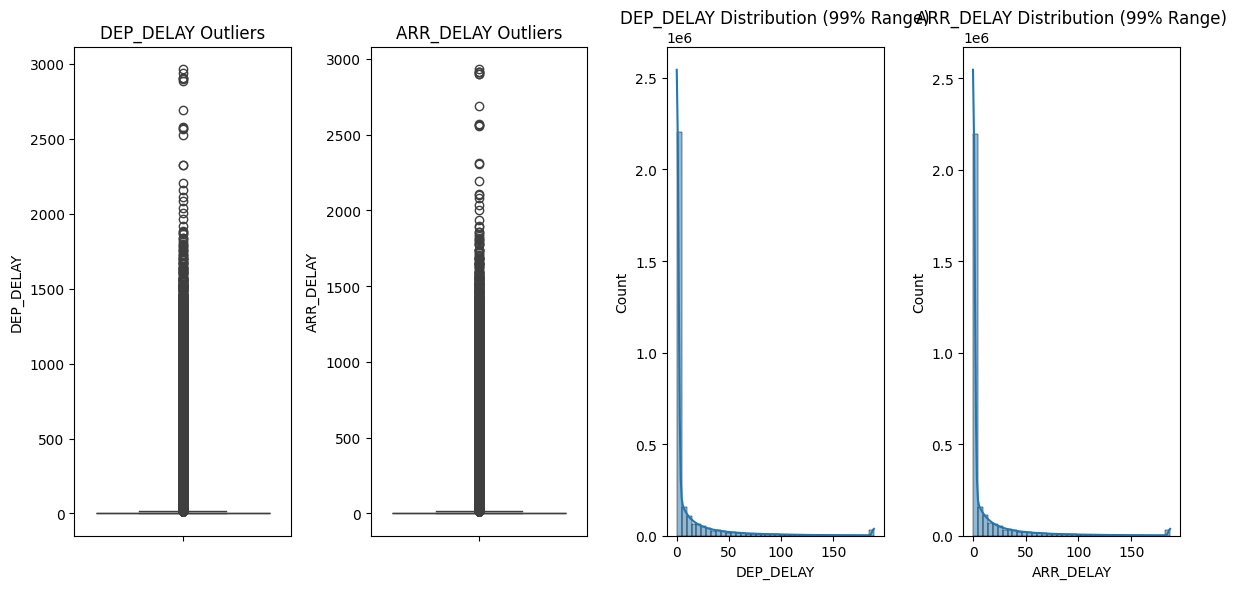

In [25]:
# Cell 9:  Univariate Analysis (Delays and Outliers)
if df is not None:
    print("## 3. EDA: Univariate Analysis - Delays ##")

    numerical_cols = ['DEP_DELAY', 'ARR_DELAY']

    plt.figure(figsize=(12, 6))

    for i, col in enumerate(numerical_cols):
        # Box Plot for Outlier Detection
        plt.subplot(1, 4, i + 1)
        sns.boxplot(y=df[col].dropna())
        plt.title(f'{col} Outliers')
        
        # Histogram (Clipped for clarity)
        plt.subplot(1, 4, i + 3)
        data_clipped = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))
        sns.histplot(data_clipped.dropna(), bins=40, kde=True)
        plt.title(f'{col} Distribution (99% Range)')

    plt.tight_layout()
    plt.show() #

## 4. EDA: Bivariate Analysis ##
Insight 1: Strong linear relationship confirms that departure delays translate directly to arrival delays.
Insight 2: Average delay varies significantly by airline.


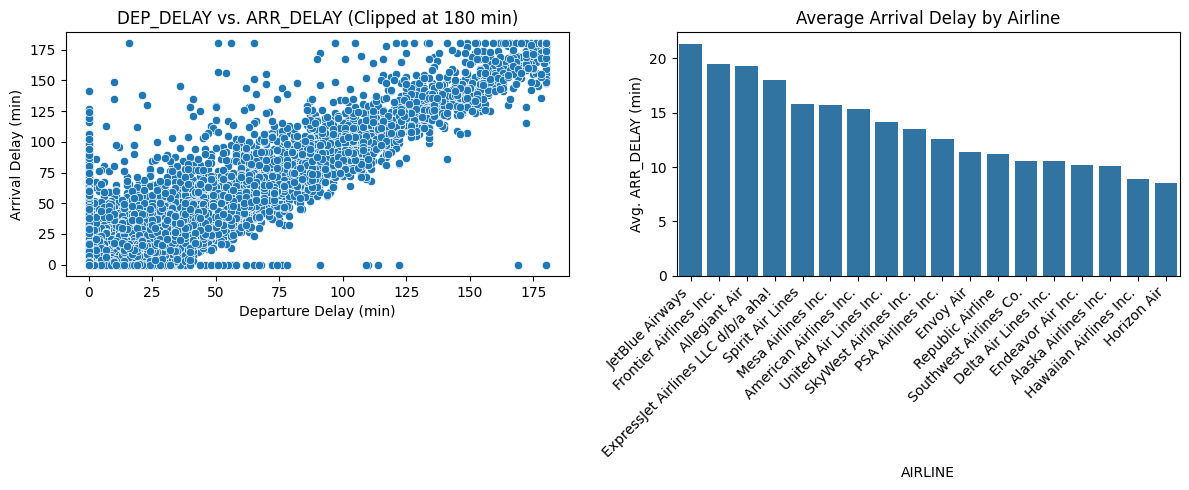

In [26]:
# Cell 10: Bivariate Analysis (Relationships) - CORRECTED
if df is not None:
    print("## 4. EDA: Bivariate Analysis ##")

    # Ensure FL_DATE is datetime for day-of-week analysis (Good practice)
    df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce') 
    
    # Sample data for scatter plot efficiency
    df_sample = df.sample(n=50000, random_state=42) 
    
    plt.figure(figsize=(12, 5))
    
    # 1. Departure Delay vs. Arrival Delay
    plt.subplot(1, 2, 1)

    #  THE FIX: Clip ONLY the 'DEP_DELAY' and 'ARR_DELAY' columns 🛑
    # Extract the two columns, apply the clip, and then use the result in scatterplot
    clipped_data = df_sample[['DEP_DELAY', 'ARR_DELAY']].clip(upper=180)
    
    # We now use the clipped DataFrame (clipped_data) for the plot
    sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=clipped_data) 
    plt.title('DEP_DELAY vs. ARR_DELAY (Clipped at 180 min)')
    plt.xlabel('Departure Delay (min)')
    plt.ylabel('Arrival Delay (min)')
    print("Insight 1: Strong linear relationship confirms that departure delays translate directly to arrival delays.")

    # 2. Average Arrival Delay by Airline
    plt.subplot(1, 2, 2)
    # The grouping/mean calculation should not include clipped data
    avg_delay_by_airline = df.groupby('AIRLINE')['ARR_DELAY'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_delay_by_airline.index, y=avg_delay_by_airline.values)
    plt.title('Average Arrival Delay by Airline')
    plt.ylabel('Avg. ARR_DELAY (min)')
    plt.xticks(rotation=45, ha='right')
    print("Insight 2: Average delay varies significantly by airline.")
    
    plt.tight_layout()
    plt.show()

In [27]:
# Cell: Outlier Handling (Capping – No Row Removal)

print("## Outlier Handling (Capping – No Data Loss) ##")

# Create a safe working copy
df_out = df.copy()

# Only columns that actually exist in dataset
delay_time_cols = [col for col in ['DEP_DELAY', 'ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME'] 
                   if col in df_out.columns]

for col in delay_time_cols:
    # Convert to numeric for safety
    df_out[col] = pd.to_numeric(df_out[col], errors='coerce')

    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count extreme values before capping
    extreme_count = ((df_out[col] < lower_bound) | (df_out[col] > upper_bound)).sum()

    # Clip values inside valid range
    df_out[col] = df_out[col].clip(lower_bound, upper_bound)

    print(f"🔹 {col}: {extreme_count} extreme values capped")

# ✅ Final shape check
final_rows, final_cols = df_out.shape
print("\n✅ Outlier capping complete — No rows removed!")
print(f"Total Rows: {final_rows}")
print(f"Total Columns: {final_cols}")


## Outlier Handling (Capping – No Data Loss) ##
🔹 DEP_DELAY: 513819 extreme values capped
🔹 ARR_DELAY: 515289 extreme values capped
🔹 ELAPSED_TIME: 152402 extreme values capped
🔹 AIR_TIME: 159203 extreme values capped

✅ Outlier capping complete — No rows removed!
Total Rows: 3000000
Total Columns: 32


In [29]:
# Cell 12: Aggregate Data for Monthly Trend Analysis (Improved Path)

import os # Ensure os is imported if running this cell separately

print("## 12Aggregating Data for Power BI ##")

# Check if the input DataFrame exists
if 'df_no_outliers' in locals() and df_no_outliers is not None:

    df_monthly = (
        df_no_outliers
        .groupby(['YEAR', 'MONTH', 'AIRLINE'])
        .agg(
            AVG_ARR_DELAY=('ARR_DELAY', 'mean'),
            TOTAL_FLIGHTS=('FL_DATE', 'count')
        )
        .reset_index()
    )

    #  FIX: Use the explicit path for saving 🛑
    output_folder = 'data' 
    output_filename = 'flights_monthly_summary.csv'
    output_path = os.path.join(os.getcwd(), output_folder, output_filename)
    
    df_monthly.to_csv(output_path, index=False)
    
    print(" Monthly summary exported successfully.")
    print(f"File saved to: {output_path}") 
    print(df_monthly.head())
    
else:
    print(" ERROR: 'df_no_outliers' not found. Please ensure Cell 8 ran successfully.")

## 12Aggregating Data for Power BI ##
 Monthly summary exported successfully.
File saved to: c:\Users\91942\OneDrive\Desktop\AirFly_Insights\data\flights_monthly_summary.csv
   YEAR  MONTH                 AIRLINE  AVG_ARR_DELAY  TOTAL_FLIGHTS
0  2019      1    Alaska Airlines Inc.          -3.48           2035
1  2019      1           Allegiant Air           1.95            682
2  2019      1  American Airlines Inc.          -1.52           7699
3  2019      1    Delta Air Lines Inc.          -6.93           7549
4  2019      1       Endeavor Air Inc.          -4.90           2021


In [30]:
# Cell 13final Aggregation and Export (Robust Path)

import os # Required for creating robust file paths
# NOTE: If you are running this cell immediately after Cell 9, 
# you should change the input DataFrame from df_feat to df_no_outliers,
# as df_no_outliers is the cleaned and outlier-handled version.

# Assuming the cleaning/outlier steps finished with 'df_no_outliers'
# If you skipped the outlier step (Cell 8), you should use 'df_feat'.
# We will use 'df_feat' here assuming you are exporting the full set of features from Cell 7.
df_to_aggregate = df_feat if 'df_feat' in locals() else None 

if df_to_aggregate is not None:
    print("## 📊 Aggregating Monthly Data for Power BI ##")

    # 1. Aggregation
    monthly_summary = (
        df_to_aggregate.groupby(['YEAR', 'MONTH', 'AIRLINE'])
        .agg(
            AVG_ARR_DELAY=('ARR_DELAY', 'mean'),
            TOTAL_FLIGHTS=('FL_DATE', 'count')
        )
        .reset_index()
    )

    # Define common folder and filenames
    output_folder = 'data'
    base_path = os.path.join(os.getcwd(), output_folder)
    
    # 2. Save Monthly Summary
    monthly_path = os.path.join(base_path, 'flights_monthly_summary.csv')
    monthly_summary.to_csv(monthly_path, index=False)

    # 3. Save Full Engineered Dataset
    full_path = os.path.join(base_path, 'flights_engineered_full.csv')
    df_to_aggregate.to_csv(full_path, index=False)

    print(" Export Complete.")
    print(f"Monthly Summary saved to: {monthly_path}")
    print(f"Full Dataset saved to: {full_path}")
    
    # Preview
    print("\n--- Monthly Summary Head ---")
    print(monthly_summary.head())
    
else:
    print(" ERROR: Input DataFrame ('df_feat' or 'df_no_outliers') not defined. Run preceding cells.")


## 📊 Aggregating Monthly Data for Power BI ##
 Export Complete.
Monthly Summary saved to: c:\Users\91942\OneDrive\Desktop\AirFly_Insights\data\flights_monthly_summary.csv
Full Dataset saved to: c:\Users\91942\OneDrive\Desktop\AirFly_Insights\data\flights_engineered_full.csv

--- Monthly Summary Head ---
   YEAR  MONTH                 AIRLINE  AVG_ARR_DELAY  TOTAL_FLIGHTS
0  2019      1    Alaska Airlines Inc.          10.36           2078
1  2019      1           Allegiant Air          15.61            692
2  2019      1  American Airlines Inc.          11.26           7863
3  2019      1    Delta Air Lines Inc.           8.94           7596
4  2019      1       Endeavor Air Inc.          15.23           2056


##  Basic Visualizations ##


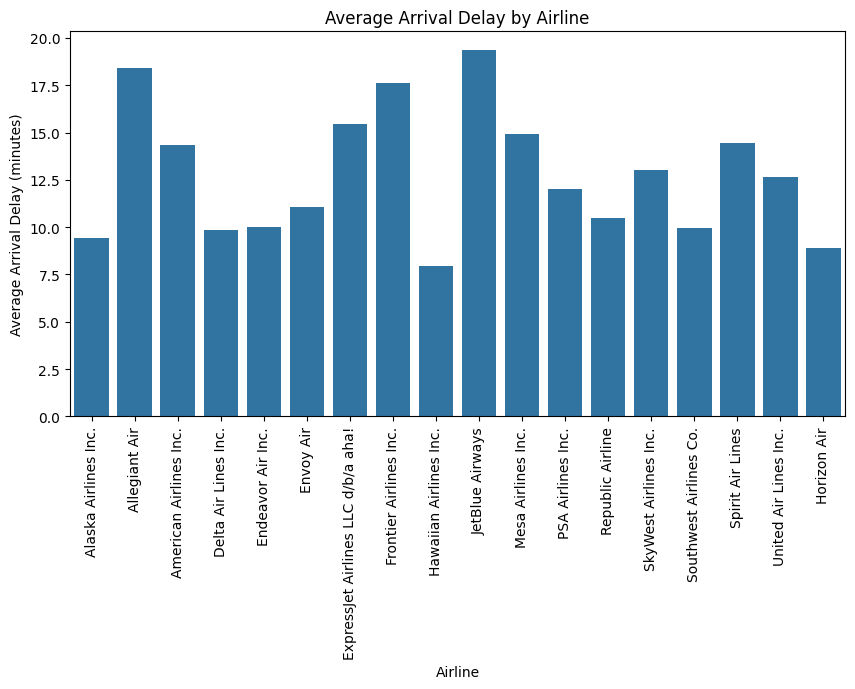

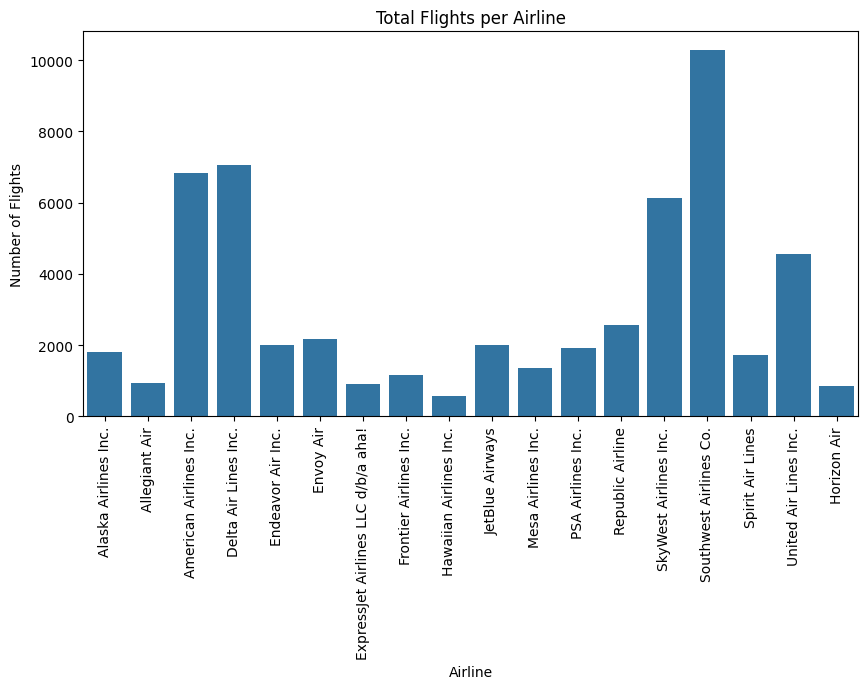

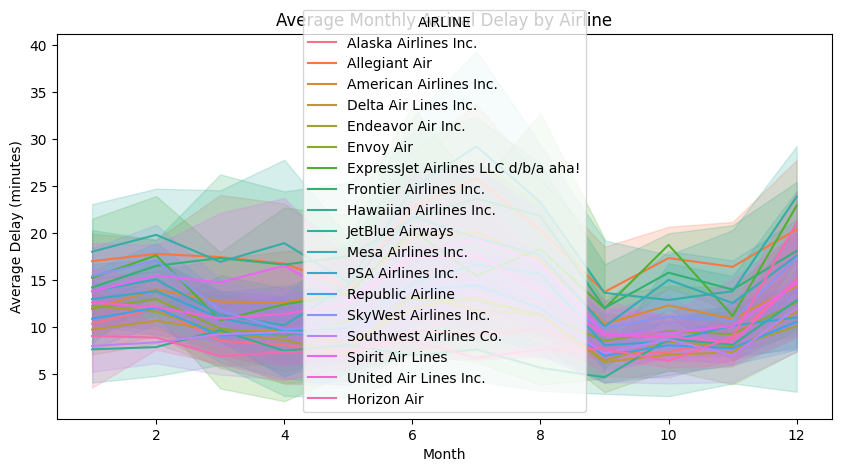

In [31]:
print("##  Basic Visualizations ##")

# 1️ Average Arrival Delay by Airline
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_summary, x='AIRLINE', y='AVG_ARR_DELAY', errorbar=None)
plt.xticks(rotation=90)
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay (minutes)')
plt.show()

# 2️ Number of Flights per Airline
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_summary, x='AIRLINE', y='TOTAL_FLIGHTS', errorbar=None)
plt.xticks(rotation=90)
plt.title('Total Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()

# 3️ Average Delay by Month
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_summary, x='MONTH', y='AVG_ARR_DELAY', hue='AIRLINE')
plt.title('Average Monthly Arrival Delay by Airline')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.show()


In [32]:
# Cell X: Create dashboard dataset (Negative delays treated, No Row Removal)
#  New file name: flights_dashboard_final.csv

import numpy as np

if 'df' in locals() and df is not None:
    print("## Creating Dashboard Dataset (No Data Loss) ##\n")

    # Create a copy dedicated for dashboard
    df_dash = df.copy()

    # Ensure numeric conversion
    for col in ['ARR_DELAY', 'DEP_DELAY']:
        if col in df_dash.columns:
            df_dash[col] = pd.to_numeric(df_dash[col], errors='coerce')

    # EARLY flags (negative delay => early)
    df_dash['EARLY_ARRIVAL'] = df_dash['ARR_DELAY'].apply(
        lambda x: 1 if pd.notna(x) and x < 0 else 0)

    df_dash['EARLY_DEPARTURE'] = df_dash['DEP_DELAY'].apply(
        lambda x: 1 if pd.notna(x) and x < 0 else 0)

    # Positive delay columns (negative → 0)
    df_dash['ARR_DELAY_POS'] = df_dash['ARR_DELAY'].apply(
        lambda x: max(x, 0) if pd.notna(x) else np.nan)

    df_dash['DEP_DELAY_POS'] = df_dash['DEP_DELAY'].apply(
        lambda x: max(x, 0) if pd.notna(x) else np.nan)

    # Final shape check
    final_rows, final_cols = df_dash.shape
    print(f" Dashboard dataset created successfully!")
    print(f"Total Rows: {final_rows}")
    print(f"Total Columns: {final_cols}")
    print(f"✔ Original negative delay values preserved")
    print(f"✔ Positive delay versions created")
    print(f"✔ Early flight flags added (binary)")

    #  Export for dashboard use
    dash_file = "flights_dashboard_final.csv"
    df_dash.to_csv(dash_file, index=False)
    print(f"\n Saved as: {dash_file}")

else:
    print(" df not found — load dataset first.")


## Creating Dashboard Dataset (No Data Loss) ##

 Dashboard dataset created successfully!
Total Rows: 3000000
Total Columns: 36
✔ Original negative delay values preserved
✔ Positive delay versions created
✔ Early flight flags added (binary)

 Saved as: flights_dashboard_final.csv
